# 정규표현식

## 정규표현식에 사용되는 메타 문자
- . ^ $ * + ? { } [ ] \ | ( )

### 문자 클래스 ( [] )
- " [ ] 사이의 문자들과 매치"라는 의미
    - 정규 표현식이 [abc]라면 이 표현식의 의미는 "a, b, c 중 한 개의 문자와 매치"를 뜻한다.


- \d : 숫자와 매치, [0-9]와 동일한 표현식 
- \D : 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식
- \s : whitespace 문자와 매치, [\t\n\r\f\v]와 동일한 표현식
- \S : whitespace 문자가 아닌 것과 매치, [^\t\n\r\f\v]와 동일한 표현식
- \w : 문자 + 숫자와 매치, [a-zA-Z0-9]와 동일한 표현식
- \W : 문자+숫자가 아닌 문자와 매치, [^a-zA-Z0-9]와 동일한 표현식

#### Dot(.)
- 정규 표현식의 Dot(.) 메타 문자는 줄바꿈 문자인 \n을 제외한 모든 문자와 매치
- re.DOTALL 옵션을 주면 \n 문자와도 매치된다
- ex) a.b = 'a + 모든 문자 + b'
- ex) a[.]b = 그대로 . 을 의미

#### 반복 ( * )
- 바로 앞에 있는 문자가 0부터 무한대로 반복될 수 있다는 의미
- ex) ca*b = ct, cat, caaat, caaaaat

#### 반복( + )
- 바로 앞에 있는 문자가 최소 1번이상 반복될 때 사용
- ex) ca+b = cb (x), cab, caaab

#### 반복 ( {m,n} )
- {}를 사용하면 반복 횟수 고정 가능
- {m, n} 반복횟수 m부터 n
- {0,} 은 *와 동일하고, {1,} 는 +와 동일 
- ca{2}t = cat (x), caat
- ca{2,5}t = cat(x), caaat

#### 반복 (?)
- {0,1}을 의미
- ex) ab?c = b가 있어도 되고 없어도 된다
- ex) ab?C = ac, abc


#### 그루핑 ()를 사용
- ex) (ABC)+ = ABC 문자열이 계속해서 반복. ABC, ABCABC, ABCABCABCABC

### re 모듈
- 문자열 검색을 위한 메서드
- p = re.compile('ab*')
- re.compile의 결과로 돌려주는 객체 p(컴파일 된 패턴 객체)

#### Method
- match() : 문자열의 처음부터 정규식과 매치되는지 조사
- search() : 문자열 전체를 검색하여 정규식과 매치되는지 조사
- findall() : 정규식과 매치되는 모든 문자열을 리스트로 돌려준다
- finditer() : 정규식과 매치되는 모든 문자열을 반복 가능한 객체로 돌려준다

- match, search는 정규식과 매치될 때는 match 객체를 돌려주고, 매치되지 않읗 때는 None을 돌려준다

##### match()

In [12]:
import re
p = re.compile('[a-z]+')
m = p.match('python')
print(m)
# 'python' 문자열은 [a-z]+ 정규식에 부합되므로 match 객체를 돌려준다

<re.Match object; span=(0, 6), match='python'>


In [13]:
n = p.match('3 python')
print(n)
# '3 python' 문자열은 [a-z]+ 정규식에 부합되지 않으므로 None을 돌려준다

None


##### search()

In [14]:
m = p.search('python')
print(m)

<re.Match object; span=(0, 6), match='python'>


In [15]:
n = p.search('3 python')
print(n)
# 문자열의 처음부터 검색하는 것이 아니라 문자열 전체를 검색하기 때문에
# 3 이후의 pytho과 매치된다

<re.Match object; span=(2, 8), match='python'>


##### findall()

In [17]:
result = p.findall('life is cool')
print(result)
# 각 단어들을 [a-z]+ 정규식과 매치해서 리스트로 돌려준다

['life', 'is', 'cool']


##### finditer

In [22]:
res = p.finditer('life is cool')
print(res)
print()
for r in res: print(r)
# 반복 가능한 객체가 포함하는 각각의 요소는 match 객체이다


<re.Match object; span=(0, 4), match='life'>
<re.Match object; span=(5, 7), match='is'>
<re.Match object; span=(8, 12), match='cool'>


#### match 객체의 메서드
- group() : 매치된 문자열을 돌려준다
- start() : 매치된 문자열의 시작 위치를 돌려준다
- end() : 매치된 문자열의 끝 위치를 돌려준다
- span() : 매치된 문자열의 (시작, 끝)에 해당하는 튜플을 돌려준다

In [23]:
m = p.match('python')
m.group()

'python'

In [24]:
m.start()

0

In [25]:
m.end()

6

In [26]:
m.span()

(0, 6)

### 예제 1)
http://www.hanbit.co.kr/store/books/full_book_list.html 페이지에서 도서 목록에 대한 url 및 제목 추출

In [34]:
import re
from urllib.request import urlopen
from html import unescape

f = urlopen('http://www.hanbit.co.kr/store/books/full_book_list.html')
encoding = f.info().get_content_charset(failobj='utf-8')
text = f.read().decode(encoding)

for partial_html in re.findall('<td class="left"><a.*</td>',text):
    print(partial_html)

<td class="left"><a href="/store/books/look.php?p_code=B2098898028">나도 글 좀 잘 쓰면 소원이 없겠네</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B8295428825">더 저널리스트 : 카를 마르크스</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B8928200501">기초수학 : Basic Mathematics&#40;2판&#41;</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B9061870792">IT CookBook, Android Studio를 활용한 안드로이드 프로그래밍&#40;5판&#41;</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B8030074555">IT CookBook, 4차 산업혁명 시대의 정보통신개론</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B5203031354">NO BULLSHIT 수학&물리 가이드</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B5034837432">IT CookBook, UI/UX 디자인 이론과 실습 with Adobe XD</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B3780991491">IT CookBook, 파이썬 for Beginner&#40;2판&#41;</a></td>
<td class="left"><a href="/store/books/look.php?p_code=B7654754187">IT CookBook, 리눅스 실습 for Beginner</a></td>
<t

책 정보 웹페이지와 연결되는 url 가져오기

In [38]:
for partial_html in re.findall('<td class="left"><a.*</td>',text):
    url = re.search('<a href="(.*)">', partial_html).group(1)
    print(url)

/store/books/look.php?p_code=B2098898028
/store/books/look.php?p_code=B8295428825
/store/books/look.php?p_code=B8928200501
/store/books/look.php?p_code=B9061870792
/store/books/look.php?p_code=B8030074555
/store/books/look.php?p_code=B5203031354
/store/books/look.php?p_code=B5034837432
/store/books/look.php?p_code=B3780991491
/store/books/look.php?p_code=B7654754187
/store/books/look.php?p_code=B6849591729
/store/books/look.php?p_code=B6314831461
/store/books/look.php?p_code=B1457611981
/store/books/look.php?p_code=B7950684957
/store/books/look.php?p_code=B5159933380
/store/books/look.php?p_code=B7592712794
/store/books/look.php?p_code=B4906042545
/store/books/look.php?p_code=B1146263510
/store/books/look.php?p_code=B4042499791
/store/books/look.php?p_code=B7019463330
/store/books/look.php?p_code=B6282611417
/store/books/look.php?p_code=B4364942864
/store/books/look.php?p_code=B5940484819
/store/books/look.php?p_code=B5719967617
/store/books/look.php?p_code=B4833189042
/store/books/loo

책 제목 추출하기
- sub 함수: 찾은 정규표현식 패턴 문자열을 다른 문자열로 변경

In [47]:
import re
from urllib.request import urlopen
from html import unescape

f = urlopen('http://www.hanbit.co.kr/store/books/full_book_list.html')
encoding = f.info().get_content_charset(failobj='utf-8')
text = f.read().decode(encoding)

for partial_html in re.findall('<td class="left"><a.*</td>',text):
#     print(partial_html)
    url = re.search('<a href="(.*)">', partial_html).group(1)
#     print(url)
    title = re.sub('<.*?>','',partial_html)
    print(title)

나도 글 좀 잘 쓰면 소원이 없겠네
더 저널리스트 : 카를 마르크스
기초수학 : Basic Mathematics&#40;2판&#41;
IT CookBook, Android Studio를 활용한 안드로이드 프로그래밍&#40;5판&#41;
IT CookBook, 4차 산업혁명 시대의 정보통신개론
NO BULLSHIT 수학&물리 가이드
IT CookBook, UI/UX 디자인 이론과 실습 with Adobe XD
IT CookBook, 파이썬 for Beginner&#40;2판&#41;
IT CookBook, 리눅스 실습 for Beginner
정보교과교육론&#40;2판&#41;
저는 주식투자가 처음인데요 기본편 &#40;2020년 개정판&#41;
저는 주식투자가 처음인데요 투자전략편 &#40;2020년 완전개정판&#41;
IT CookBook, 비주얼 베이직 2019 입문
팀 개발을 위한 Git, GitHub 시작하기
NO BULLSHIT 선형대수학 가이드
IT CookBook, C 언어 일취월장
세상에서 제일 친절한 엑셀 매크로&VBA
회사에서 바로 통하는 엑셀 FOR STARTERS
라임튜브와 함께하는 우리 아이 유튜브 스타 만들기
IT CookBook, UI 디자인과 프로토타이핑을 위한 Adobe XD
IT CookBook, 스크래치로 배우는 컴퓨팅 사고
IT CookBook, 객체 지향 설계와 분석을 위한 UML 기초와 응용
IT CookBook, 초연결 사회를 위한 컴퓨터 개론
IT CookBook, 엑셀로 배우는 데이터 분석
실무로 완성하는 PLC&#40;멜섹Q&#41; : 서보를 이용한 위치 제어
김불꽃의 불꽃 튀는 성인식
리얼 오사카 교토·고베·나라 [2020~2021개정판]
왜 나는 매일 아이에게 미안할까
창업의 과학
Stata로 끝내는 논문
쿠버네티스를 활용한 클라우드 네이티브 데브옵스
리얼 상하이 항저우·쑤저우 [2020~2021년 개정판]
리얼 괌 [2020~2021년 최신판]
알쏭달쏭 C 언어 180제
고전 컴퓨터 알고리즘 인 파이썬
그로킹

In [49]:
import re
from urllib.request import urlopen
from html import unescape

f = urlopen('http://www.hanbit.co.kr/store/books/full_book_list.html')
encoding = f.info().get_content_charset(failobj='utf-8')
text = f.read().decode(encoding)

for partial_html in re.findall('<td class="left"><a.*</td>',text):
#     print(partial_html)
    url = re.search('<a href="(.*)">', partial_html).group(1)
#     print(url)
    url = 'http://www.hanbit.co.kr'+url
    title = re.sub('<.*?>','',partial_html)
    print('url :', url)
    print('title : ', title)
    print('---')

url : http://www.hanbit.co.kr/store/books/look.php?p_code=B2098898028
title :  나도 글 좀 잘 쓰면 소원이 없겠네
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B8295428825
title :  더 저널리스트 : 카를 마르크스
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B8928200501
title :  기초수학 : Basic Mathematics&#40;2판&#41;
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B9061870792
title :  IT CookBook, Android Studio를 활용한 안드로이드 프로그래밍&#40;5판&#41;
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B8030074555
title :  IT CookBook, 4차 산업혁명 시대의 정보통신개론
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B5203031354
title :  NO BULLSHIT 수학&물리 가이드
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B5034837432
title :  IT CookBook, UI/UX 디자인 이론과 실습 with Adobe XD
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B3780991491
title :  IT CookBook, 파이썬 for Beginner&#40;2판&#41;
---
url : http://www.hanbit.co.kr/store/books/look.php?p_code=B76547

### 예제 2)
- https://search.shopping.naver.com/search/category.nhn?cat_id=50000148
- 위의 페이지에서 상품명만을 추출

In [74]:
import re
from urllib.request import urlopen
from html import unescape

f = urlopen('https://search.shopping.naver.com/search/category.nhn?cat_id=50000148')
encoding = f.info().get_content_charset(failobj='utf-8')
text = f.read().decode(encoding)

for pro in re.findall('<div class="tit">.*?</div>',text, re.DOTALL):
#     print(pro)
    title = re.search('title="(.*)"',pro).group(1)
    print('제품명 : ' ,title)
    print('---')

제품명 :  콩스콩스 원두커피 1kg 10+1
---
제품명 :  모두의커피 원두커피 1kg
---
제품명 :  원두커피 1kg 분쇄 원두콩 가루 10+1
---
제품명 :  임산부루이보스 포터블 케이스
---
제품명 :  일리 캡슐커피 37종 (네스프레소 호환포함)
---
제품명 :  스파클 2L
---
제품명 :  맥심 모카골드 400T/화이트/커피믹스/커피
---
제품명 :  웅진식품 [웅진식품]빅토리아 탄산수/음료 500mlx40pet  11종 중 택2
---
제품명 :  네스프레소 캡슐 커피24종 우체국 당일발송/ Nespresso 캡슐
---
제품명 :  동서식품 맥심 모카골드 마일드 12g x 400개입
---
제품명 :  삼다수 2L
---
제품명 :  안내 레이어 닫기" type="button
---
제품명 :  [웅진식품]빅토리아 탄산수/탄산음료 1+1 (500mlx40)
---
제품명 :  삼다수 500ml
---
제품명 :  스파클 500ml
---
제품명 :  농심 백산수 2L
---
제품명 :  안심박스) 제주 삼다수 2L x10개 or 500ml x40 / 12
---
제품명 :  웅진 빅토리아 탄산수 플레인  500ml  40개
---
제품명 :  일리 캡슐 커피 19종 (네스프레소 호환포함)
---
제품명 :  동서식품 맥심 화이트 골드 커피믹스 11.7g x 160개입
---
제품명 :  코카콜라 캔/페트 업소용 190ml 245m 355ml 500ml 1.25리터
---
제품명 :  [14만 리뷰돌파] 공식판매점 네스카페 돌체구스토 캡슐 신제품 출시
---
제품명 :  동서식품 맥심 화이트골드 11.7g x 400개입
---
제품명 :  G7 베트남 수출용 블랙커피 2g x 200개입
---
제품명 :  안내 레이어 닫기" type="button
---
제품명 :  동서식품 카누 미니 마일드로스트 아메리카노 0.9g x 150개입
---
제품명 :  쟈뎅 쟈뎅 아워티 자몽 블랙티 10p
---
제품명 :  카누 미니 다크 마일

### Request 모듈
- Python에서 HTTP 요청을 보내는 모듈
- GET
    - r = requests.get(url, params={'id':'kim','pw':'1234'})
- POST
    - r = requests.post(url, data={'id':'kim', 'pw':'1234'})
- 인증이 필요한 경우
    - auth옵션 사용

In [78]:
import requests
res = requests.get('http://hanbit.co.kr')
# 응답 객체 res 생성

In [76]:
type(res)

requests.models.Response

In [77]:
res.status_code

200

Request모듈 - GET 방식

In [79]:
url = 'http://hanbit.co.kr'
params = {'params1':'value1', 'params2':'value2'}
res = requests.get(url,params=params)

In [80]:
res.url

'http://www.hanbit.co.kr/?params1=value1&params2=value2'

Requests모듈 - POST 방식

In [83]:
url = 'http://hanbit.co.kr'
params = {'params1':'value1', 'params2':'value2'}
res1= requests.get(url,data=params)

In [84]:
res1.url

'http://www.hanbit.co.kr/'

Requests모듈 - 인증이 필요한 경우 (auth 옵션)
- r = requests.get('https://api.github.com/user',
                auth=('<GitHub의 사용자 ID>', '<Github의 비밀번호>''))

In [85]:
url = 'https://www.naver.com'
res = requests.post(url, auth=('id','pass'))

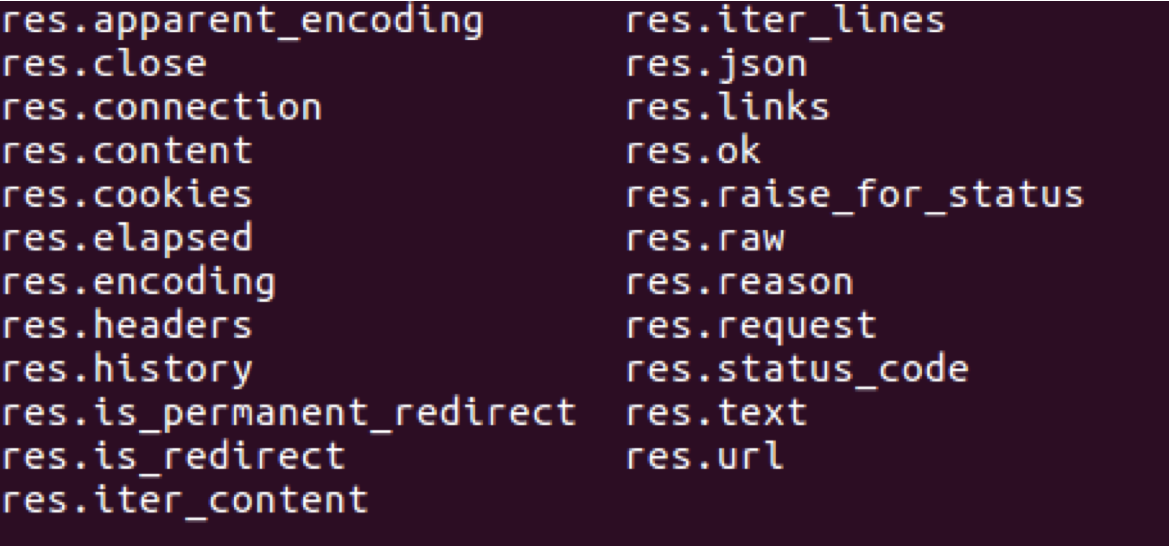

In [88]:
from IPython.display import Image
Image('./re_obj.png')
# Response 객체

In [89]:
import requests

url = 'http://www.naver.com'
rs = requests.post(url)

if int(rs.status_code) == 200:
    print('okay')
    print(rs.text)
else:
    print('rs_code')
    print('fail')

okay
<!doctype html>
















<html lang="ko">
<head>
<meta charset="utf-8">
<meta name="Referrer" content="origin">
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=1100">
<meta name="apple-mobile-web-app-title" content="NAVER" />
<meta name="robots" content="index,nofollow"/>
<meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>
<meta property="og:title" content="네이버">
<meta property="og:url" content="https://www.naver.com/">
<meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png">
<meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/>
<meta name="twitter:card" content="summary">
<meta name="twitter:title" content="">
<meta name="twitter:url" content="https://www.naver.com/">
<meta name="twitter:image" content="https:/

### 예제 3)
- url을 입력하면 해당 웹 페이지의 쿠키값을 출력

In [90]:
url = input('url 입력하시오 : ')

rs = requests.post(url)

print(rs.cookies)

url 입력하시오 : http://www.naver.com
<RequestsCookieJar[<Cookie PM_CK_loc=bf2da2e7f853c7203680853dd6685c6e5294bd8502b514b8b92773e9b8352492 for www.naver.com/>]>


### XPath & CSS Selector
- XPath : XML 구문에서 경로를  표현하는 언어
- CSS : CSS 선택 문법을 이용하여 태그 검색

#### XPath
- // : 가장 상위 Element
- . : 현재 Elemnet
- * : 조건에 마즌ㄴ 앞부분의 하위 Element를 살펴 봄 (css selector에서 한칸 띄기와 같음)
- / : 바로 아래 요소 (css selector 에서 > 와 같음)
- element[조건]
    - p[2] : p element의 두 번째 element --> index가 0이 아닌 1부터 시작
    - [@(attribute key)='(attribute value']
    -[@id='email'] : 아이디 값이 email인 element
    -[@class='pw'] : 클래스 값이 pw인 element
- not
    - not(조건) : 조건이 아닌 요소를 찾음
- ex) '//body/h1' : body 요소의 자식 중에서 h1 태그
- ex) input[@type='text'] : type 속성이 'text'인 input 요소

#### CSS
- # : id
- . : class
- '>' : 하위
- ex) 'body > h1' : body 요소의 자식 중에서 h1 태그
- ex) #main : id 속성이 'main'인 요소

In [91]:
import lxml.html

tree = lxml.html.parse('http://www.hanbit.co.kr/store/books/full_book_list.html')
html = tree.getroot()

for a in html.xpath('//a'):
    print(a.get('href'), a.text)

#gnb None
#top_search None
#container None
http://www.hanbit.co.kr/index.html None
http://www.hanbit.co.kr/media/ 한빛미디어
http://www.hanbit.co.kr/academy/ 한빛아카데미
http://www.hanbit.co.kr/biz/ 한빛비즈
http://www.hanbit.co.kr/life/ 한빛라이프
http://www.hanbit.co.kr/edu/ 한빛에듀
http://www.hanbit.co.kr/realtime/ 리얼타임
http://www.hanbit.co.kr/textbook/ 한빛정보교과서
http://www.hanbit.co.kr/rent/ 한빛대관서비스
https://www.hanbit.co.kr/member/login.html 로그인
https://www.hanbit.co.kr/member/member_agree.html 회원가입
http://www.hanbit.co.kr/myhanbit/myhanbit.html 마이한빛
http://www.hanbit.co.kr/myhanbit/cart.html 장바구니
http://www.hanbit.co.kr/index.html 한빛출판네트워크
http://www.hanbit.co.kr/brand/brand_submain.html BRAND
http://www.hanbit.co.kr/channel/channel_submain.html Channel.H
http://www.hanbit.co.kr/store/store_submain.html STORE
http://www.hanbit.co.kr/support/help_info.html SUPPORT
http://www.hanbit.co.kr/event/current/current_event_list.html EVENT
javascript:; None
# 카테고리
/store/books/category_list.html?cate_cd=001 IT/모바일

#### XPath 사용 실습
- type 속성이 'text'인 input요소 ://input[@type='text']
- href 속성이 'http://'로 시작하는 a 요소 : //a[starts-with@href, 'http://')]
- src 속성이 'jpg'로 끝나는 img 요소 : //img[ends-with(@src,'jpg')]
- 요소 내부에 '개요'라는 텍스트 노드가 포함돼 있는 h2 요소
    - //h2[contains(., '개요')]

#### CSS Selector 사용
- cssselector 모듈 설치
- condda install -c anaconda cssselect

In [93]:
import lxml.html

tree = lxml.html.parse('http://www.hanbit.co.kr/store/books/full_book_list.html')
html = tree.getroot()

for a in html.cssselect('a'):
    print(a.get('href'), a.text)

#gnb None
#top_search None
#container None
http://www.hanbit.co.kr/index.html None
http://www.hanbit.co.kr/media/ 한빛미디어
http://www.hanbit.co.kr/academy/ 한빛아카데미
http://www.hanbit.co.kr/biz/ 한빛비즈
http://www.hanbit.co.kr/life/ 한빛라이프
http://www.hanbit.co.kr/edu/ 한빛에듀
http://www.hanbit.co.kr/realtime/ 리얼타임
http://www.hanbit.co.kr/textbook/ 한빛정보교과서
http://www.hanbit.co.kr/rent/ 한빛대관서비스
https://www.hanbit.co.kr/member/login.html 로그인
https://www.hanbit.co.kr/member/member_agree.html 회원가입
http://www.hanbit.co.kr/myhanbit/myhanbit.html 마이한빛
http://www.hanbit.co.kr/myhanbit/cart.html 장바구니
http://www.hanbit.co.kr/index.html 한빛출판네트워크
http://www.hanbit.co.kr/brand/brand_submain.html BRAND
http://www.hanbit.co.kr/channel/channel_submain.html Channel.H
http://www.hanbit.co.kr/store/store_submain.html STORE
http://www.hanbit.co.kr/support/help_info.html SUPPORT
http://www.hanbit.co.kr/event/current/current_event_list.html EVENT
javascript:; None
# 카테고리
/store/books/category_list.html?cate_cd=001 IT/모바일

#### CSS Selector 사용 실습
- title 요소 : title
- body 요소의 자식 중 h1 요소 : body > h1
- type 속성이 'text'인 input 요소 : input[type='text']
- href 속성이 'http://'로 시작하는 a 요소 : a[href^='http://']
- 요소의 내부에 '개요'라는 텍스트 노드가 포함돼 있는 h2 요소
    - h2:contains('개요')

### fromstirng()
- HTML로 작성된 문자열에서 데이터 추출시 사용

In [102]:
import lxml.html

tree = lxml.html.fromstring(
'''<!DOCTYPE html>
<html>
<head>
    <title>lxml tutorials</title>.
</head>
<div>
    <div class='cc cv'><i>Hello</i>world!!!</div>
</div>.
</html>''')
    
selectors = tree.cssselect('i')

for element in selectors:
    print(element.text)

Hello


### 예제 4)
- url을 입력하면 해당 웹 페이지에 존재하는 'http://'로 시작하는 모든 url 정보 출력

In [127]:
url = input('url을 입력하시오 : ')

url을 입력하시오 : http://www.daum.net


In [129]:
# a[href^='http://']
type(url)

str

In [140]:
import lxml.html
import requests 

res = requests.get(url)

print(res.text)
p = r'<a href.*>'
for element in res:
    if element == re.match(p, res.text):
        print(element)

<!DOCTYPE html>
<html lang="ko" class="">
<head>
<meta charset="utf-8"/>
<title>Daum</title>
<meta property="og:url" content="https://www.daum.net/">
<meta property="og:type" content="website">
<meta property="og:title" content="Daum">
<meta property="og:image" content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">
<meta property="og:description" content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum">
<meta name="msapplication-task" content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico">
<meta name="msapplication-task" content="name=미디어다음;action-uri=http://media.daum.net/;icon-uri=/media_favicon.ico">
<meta name="msapplication-task" content="name=메일;action-uri=http://mail.daum.net;icon-uri=/mail_favicon.ico">
<meta name="referrer" content="origin">
<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="다음">
<style type="text/css">
@charset "utf-8";
body,div,dl,dt,dd,ul,ol,li,h1,h2,h3,h4,h5,h6,pre,code,form,f